# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get current date
date = datetime.date(datetime.now())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
x=0
temps = []
lat = []
lng = []
humidity = []
wind = []
clouds = []
bad_cities = []
for city in cities:
    request = base_url + city + "&appid=" + weather_api_key + "&units=imperial"
    print(f'Gathering data for city {x}, {city}.')
    x+= 1
    response = requests.get(request).json()
    try:
        temps.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
    except:
        print(f'{city} has no data.')
        bad_cities.append(city)
    

Gathering data for city 0, kruisfontein.
Gathering data for city 1, khatanga.
Gathering data for city 2, new norfolk.
Gathering data for city 3, rampura.
Gathering data for city 4, tullamore.
Gathering data for city 5, pevek.
Gathering data for city 6, taolanaro.
taolanaro has no data.
Gathering data for city 7, kloulklubed.
Gathering data for city 8, doka.
Gathering data for city 9, bridlington.
Gathering data for city 10, hermanus.
Gathering data for city 11, economy.
Gathering data for city 12, maslovka.
Gathering data for city 13, albany.
Gathering data for city 14, saskylakh.
Gathering data for city 15, mys shmidta.
mys shmidta has no data.
Gathering data for city 16, hasaki.
Gathering data for city 17, abu kamal.
Gathering data for city 18, ahipara.
Gathering data for city 19, ancud.
Gathering data for city 20, vila.
Gathering data for city 21, rikitea.
Gathering data for city 22, vostok.
Gathering data for city 23, illoqqortoormiut.
illoqqortoormiut has no data.
Gathering data f

Gathering data for city 201, arraial do cabo.
Gathering data for city 202, vao.
Gathering data for city 203, samoded.
Gathering data for city 204, bathsheba.
Gathering data for city 205, mahebourg.
Gathering data for city 206, lake ridge.
Gathering data for city 207, benghazi.
Gathering data for city 208, praya.
Gathering data for city 209, umzimvubu.
umzimvubu has no data.
Gathering data for city 210, kununurra.
Gathering data for city 211, marzuq.
Gathering data for city 212, virginia beach.
Gathering data for city 213, alofi.
Gathering data for city 214, hithadhoo.
Gathering data for city 215, tiksi.
Gathering data for city 216, manta.
Gathering data for city 217, grand centre.
grand centre has no data.
Gathering data for city 218, byron bay.
Gathering data for city 219, tabiauea.
tabiauea has no data.
Gathering data for city 220, lumding.
Gathering data for city 221, mogapinyana.
Gathering data for city 222, broome.
Gathering data for city 223, kjollefjord.
Gathering data for city 

Gathering data for city 400, galesong.
Gathering data for city 401, lata.
Gathering data for city 402, olinda.
Gathering data for city 403, poum.
Gathering data for city 404, martapura.
Gathering data for city 405, aykhal.
Gathering data for city 406, nyandoma.
Gathering data for city 407, grindavik.
Gathering data for city 408, sola.
Gathering data for city 409, villazon.
Gathering data for city 410, bonavista.
Gathering data for city 411, dharur.
Gathering data for city 412, raudeberg.
Gathering data for city 413, ginda.
Gathering data for city 414, poso.
Gathering data for city 415, high rock.
Gathering data for city 416, golyshmanovo.
Gathering data for city 417, arruda dos vinhos.
Gathering data for city 418, kachikau.
kachikau has no data.
Gathering data for city 419, ostrovnoy.
Gathering data for city 420, chapais.
Gathering data for city 421, north bend.
Gathering data for city 422, meulaboh.
Gathering data for city 423, along.
Gathering data for city 424, loukhi.
Gathering dat

In [4]:
#print(json.dumps(response, indent=4, sort_keys=True))
print(response['main']['temp'])
print(response['coord']['lat'])
print(response['coord']['lon'])
print(response['main']['humidity'])
print(response['wind']['speed'])
print(response['clouds']['all'])

0.03
60.05
69.9
91
11.16
100


In [5]:
#remove cities with no data
clean_cities = cities
for bad in bad_cities:
    clean_cities.remove(bad)

In [6]:
#verify all arrays are the same length
print(len(cities))
print(len(temps))
print(len(lat))
print(len(humidity))
print(len(wind))
print(len(clouds))
print(len(clean_cities))

567
567
567
567
567
567
567


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create DataFrame
weather_df = {"City": clean_cities, "Temperatures (F)": temps, "Latitude" : lat,
              "Longitude": lng,"Humidity %" : humidity, "Wind (mph)" : wind, "Cloudiness": clouds}
weather_df = pd.DataFrame(weather_df)
#export to csv
weather_df.to_csv("../output_data/weather_data.csv")
weather_df

,City,Temperatures (F),Latitude,Longitude,Humidity %,Wind (mph),Cloudiness
0,kruisfontein,62.01,-34.0033,24.7314,86,1.01,54
1,khatanga,-27.20,71.9667,102.5000,80,12.59,13
2,new norfolk,58.37,-42.7826,147.0587,64,1.99,100
3,rampura,57.15,30.2500,75.2333,49,1.97,0
4,tullamore,34.50,53.2739,-7.4889,69,7.00,28
...,...,...,...,...,...,...,...
562,norfolk,27.07,42.1668,-71.2495,86,9.22,96
563,veriora,14.00,58.0079,27.3551,85,5.75,90
564,luganville,85.95,-15.5333,167.1667,54,4.54,4
565,llanes,53.01,43.4198,-4.7549,68,5.01,100


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_clean = weather_df.loc[weather_df['Humidity %']<=100]
weather_clean

,City,Temperatures (F),Latitude,Longitude,Humidity %,Wind (mph),Cloudiness
0,kruisfontein,62.01,-34.0033,24.7314,86,1.01,54
1,khatanga,-27.20,71.9667,102.5000,80,12.59,13
2,new norfolk,58.37,-42.7826,147.0587,64,1.99,100
3,rampura,57.15,30.2500,75.2333,49,1.97,0
4,tullamore,34.50,53.2739,-7.4889,69,7.00,28
...,...,...,...,...,...,...,...
562,norfolk,27.07,42.1668,-71.2495,86,9.22,96
563,veriora,14.00,58.0079,27.3551,85,5.75,90
564,luganville,85.95,-15.5333,167.1667,54,4.54,4
565,llanes,53.01,43.4198,-4.7549,68,5.01,100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
#get current date
from datetime import datetime
date = datetime.date(datetime.now())
print(date)

2021-02-07


## Latitude vs. Temperature Plot

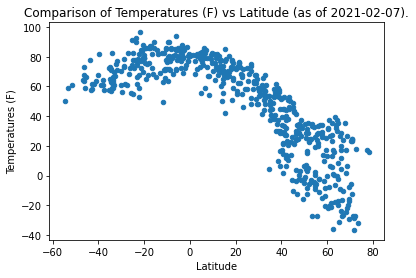

In [10]:
weather_clean.plot('Latitude', "Temperatures (F)", kind = 'scatter')
plt.title(f'Comparison of Temperatures (F) vs Latitude (as of {date}).')
plt.show()

## Latitude vs. Humidity Plot

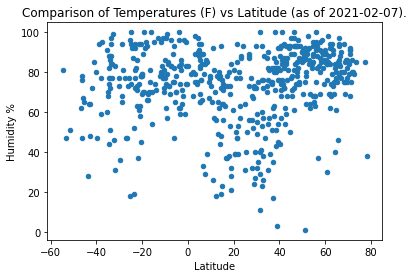

In [11]:
weather_clean.plot('Latitude', "Humidity %", kind = 'scatter')
plt.title(f'Comparison of Temperatures (F) vs Latitude (as of {date}).')
plt.show()

## Latitude vs. Cloudiness Plot

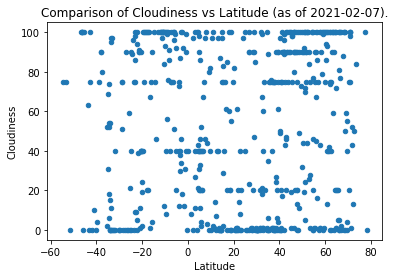

In [12]:
weather_clean.plot('Latitude', "Cloudiness", kind = 'scatter')
plt.title(f'Comparison of Cloudiness vs Latitude (as of {date}).')
plt.show()

## Latitude vs. Wind Speed Plot

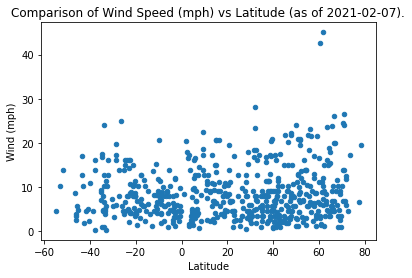

In [13]:
weather_clean.plot('Latitude', "Wind (mph)", kind = 'scatter')
plt.title(f'Comparison of Wind Speed (mph) vs Latitude (as of {date}).')
plt.show()

## Linear Regression

In [14]:
northern_hem_df = weather_clean.loc[weather_clean['Latitude']>= 0]
southern_hem_df = weather_clean.loc[weather_clean['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

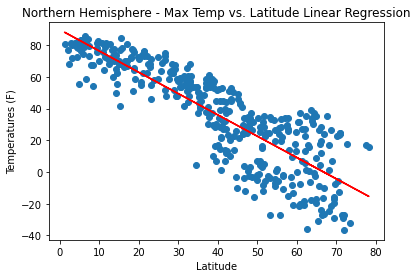

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Temperatures (F)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Temperatures (F)'])
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel("Temperatures (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

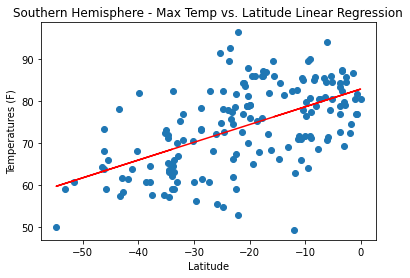

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'], southern_hem_df['Temperatures (F)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'], southern_hem_df['Temperatures (F)'])
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel("Temperatures (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

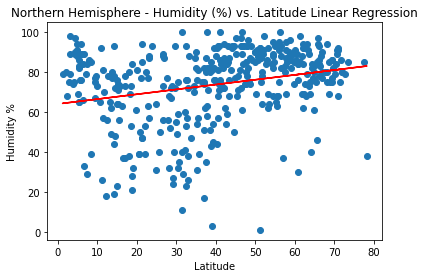

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Humidity %'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Humidity %'])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel("Humidity %")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

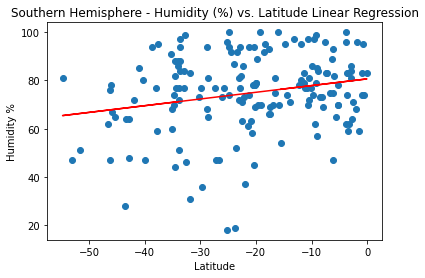

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'],southern_hem_df['Humidity %'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'],southern_hem_df['Humidity %'])
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel("Humidity %")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

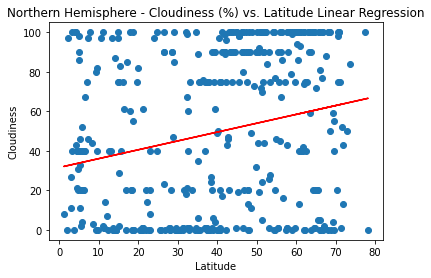

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Cloudiness'])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

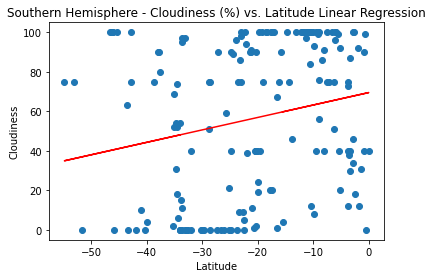

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'], southern_hem_df['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'], southern_hem_df['Cloudiness'])
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

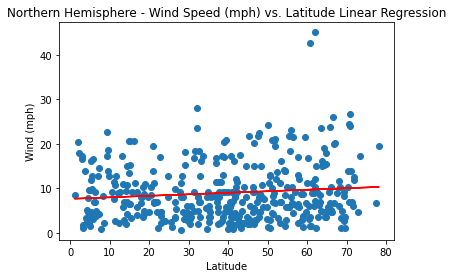

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem_df['Latitude'], northern_hem_df['Wind (mph)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = northern_hem_df['Latitude'] * slope + intercept
plt.plot(northern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(northern_hem_df['Latitude'], northern_hem_df['Wind (mph)'])
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel("Wind (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

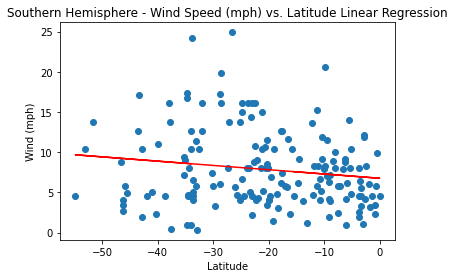

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem_df['Latitude'], southern_hem_df['Wind (mph)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = southern_hem_df['Latitude'] * slope + intercept
plt.plot(southern_hem_df['Latitude'], regress_values, "r-")
plt.scatter(southern_hem_df['Latitude'], southern_hem_df['Wind (mph)'])
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel("Wind (mph)")
plt.show()